In [63]:
conda install -c conda-forge fuzzywuzzy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Nikolay\anaconda3

  added / updated specs:
    - fuzzywuzzy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    fuzzywuzzy-0.18.0          |     pyhd8ed1ab_0          22 KB  conda-forge
    python-levenshtein-0.12.2  |   py39hb82d6ee_2          82 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  fuzzywuzzy         conda-forge/noarch::fuzzywuzzy-0.18.0-pyhd8ed1ab_0
  python-levenshtein conda-forge/win-64::python-levenshtein-0.12.2-py39hb82d6ee_2
  python_abi         conda-forge/win-64::python_abi-3.9

In [111]:
import re
import pandas as pd
from fuzzywuzzy import fuzz

### TASK    
С использованием библиотек Numpy и Pandas написать программу реализующую:
* Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
* Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
* Подсчет длин предложений и их количества.
* Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы “объекты - признаки”.
* Построение гистограммы частоты встречаемости слов.


### FTR-1

> Чтение текста из файла.

**Реализация:** Чтение файла целиком в память используя стандартные инструменты для чтения файлов python.
**Возможные проблемы:** Файл может быть слишком большим для помещения в оперативную память

### FTR-2

> Разбиение текста на массив слов

**Реализация:** Разбить текст  на слова с помощью regexp

In [18]:
# Пример реализации функции разбиения текста на слова с помощью regexp
def split_into_words(line):
    word_matcher = re.compile(r"(\w[\w']*\w|\w)")
    return word_matcher.findall(line)

# тест
input = """Oh, you can't help that,' said the Cat: 'we're all mad here. I'm mad. You're mad."""
output = split_into_words(input);
expected = ['Oh', 'you', "can't", 'help', 'that', 'said', 'the', 'Cat', "we're", 'all', 'mad', 'here', "I'm", 'mad', "You're", 'mad']
assert output, expected

### FTR-4

> источник для стоп-слов и работа с ними

**Реализация:** 
* можно использовать готовые наборы стоп слов например [ссылка](https://github.com/stopwords-iso/stopwords-ru)
* список стоп-слов читать из отдельного файла, так мы сможем легко удалять/добавлять стоп-слова для алгоритма, плюс мы можем иметь несколько наборов файлов например для разных языков
* для хранения использовать Set так мы исключаем дубликаты, и можем проверять наличие такого элемента со сложностью o(1)

In [28]:
stopWords = {'и', 'а', 'или', 'я', 'ты'}
assert True, 'или' in stopWords

### FTR-5

> Подсчет количества всех слов исключая стоп слова

**Реализация:**
* для храниния используем Dictionary где ключ это слово, а значение это счетчик
* Получаем следующее слово из текста
* Проверяем что это не стоп-слово
* Добавляем в нашу серию итерируя счетчик


In [59]:
stop_words = {'в', 'а', 'эту', 'туда', 'к', 'чем'}

text = ['Человечество', 'стремится', 'человечество',  'в', 'космос', 'А', 'КОСМОС','чем', 'объяснить', 'эту', 'тягу', 'туда', 'к', 'далёким', 'Галактикам', 'в', 'бесконечность', 'в', 'неизвестность']

def analyze():
    result = dict();
    for word in text: 
        word = word.lower();
        if word not in stop_words:
            counter = result.get(word, 0);
            result[word] = counter + 1
    return result
       
    
print(analyze())





{'человечество': 2, 'стремится': 1, 'космос': 2, 'объяснить': 1, 'тягу': 1, 'далёким': 1, 'галактикам': 1, 'бесконечность': 1, 'неизвестность': 1}


### FTR-6

> Определение похожести слов 

**Реализация:**
* Для определение похожести слова есть алгоритм сравнения растояний Левенштейна, на выходе мы получем коэффициент похожести слов
* ипользуем реализацию этого алгоритма из библиотеки fuzzywuzzy
* коэффициент выбираем эмпирически

In [148]:
def is_similar(wordA, wordB, k):
    return fuzz.ratio(wordA, wordB) > k

print(is_similar("огурец", "огурцы", 80))
print(is_similar('соленый', 'привет', 80))
print(is_similar('соленый', 'слоенный', 80))


True
False
False


### FTR-7

> Подсчет количества и длин предложений

**Реализация**
* Разбиваем текст по точкам
* Количество массивов - количество предложений
* Длины массивов - длины предложений

In [167]:
text = 'В город ворвалась зима. Еще вчера ветер гонял по улицам опавшие листья, моросил холодный дождь. Сегодня же с утра все белым-бело. За ночь снежная туча щедро поделилась снегом, который теперь искрился и переливался в лучах яркого утреннего солнца. Лицо прохожих, одетых в теплые шубы и пуховики, были по-детски радостными.' 

sentences = text.split('.');
print('sentences count: ', len(sentences))
print('lenth of (2) sentence', len(sentences[1]))


sentences count:  6
lenth of 2 sentence 71


### FTR-8

> Отображение гистограммы для слов

<AxesSubplot:>

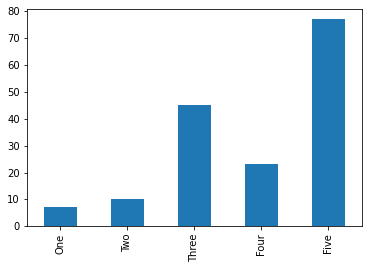

In [129]:
dic = {"One" : 7, "Two" : 10, "Three" : 45, "Four" : 23, "Five" : 77 }

a = pd.Series(dic.values(), dic.keys())
a.plot(kind="bar")


### FTR-9

> группировка слов по похожести

* у нас уже есть словарь в котором подсчитано частота слов из текста исключая стоп слова
* сгрупировать слова по похожести
* Проходим вложенным циклом по словарю если слова похожи то увеличиваем счетчик в результирующем словаре
*Недостаток* сложность алгоритма о(n2)

In [158]:
def group(given):
    result = dict()
    for word in dic:
        counts = getSimilarWordCounts(given, word)
        if counts > 0:
            result[word]=counts
    return result;

def getSimilarWordCounts(dic, word):
    counter = 0;
    for w in dic:
        if is_similar(word, w, 60):
            counter += dic.get(w)
            dic[w]=0
    return counter;
    
given = {"Первый" : 7, "Первая" : 10, "Первого" : 45, "Привет" : 23, "Мир" : 77 }
print(group(given))

{'Первый': 62, 'Привет': 23, 'Мир': 77}
